In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [15]:
# reading the data
data = pd.read_csv('titanic_preprocessed.csv')

In [16]:
data.shape

(891, 25)

In [17]:
data.isnull().sum()

Survived      0
Age           0
Fare          0
Pclass_1      0
Pclass_2      0
Pclass_3      0
Sex_female    0
Sex_male      0
SibSp_0       0
SibSp_1       0
SibSp_2       0
SibSp_3       0
SibSp_4       0
SibSp_5       0
SibSp_8       0
Parch_0       0
Parch_1       0
Parch_2       0
Parch_3       0
Parch_4       0
Parch_5       0
Parch_6       0
Embarked_C    0
Embarked_Q    0
Embarked_S    0
dtype: int64

In [18]:
X = data.drop(['Survived'], axis = 1)
y = data['Survived']

In [19]:
# create validation set
from sklearn.model_selection import train_test_split

In [26]:
X_train, X_valid, y_train, y_valid = train_test_split(X,y, test_size = 0.25)

In [27]:
# distribution in training set
y_train.value_counts(normalize = True)

0    0.621257
1    0.378743
Name: Survived, dtype: float64

In [28]:
# shape of training set
X_train.shape, y_train.shape

((668, 24), (668,))

In [29]:
# distribution in validation set
y_valid.value_counts(normalize = True)

0    0.600897
1    0.399103
Name: Survived, dtype: float64

In [30]:
# shape of validation set
X_valid.shape, y_valid.shape

((223, 24), (223,))

### Decision Tree model

In [33]:
from sklearn.tree import DecisionTreeClassifier

In [35]:
# creating the decision tree function
model = DecisionTreeClassifier(random_state=5)

In [36]:
# fitting the training data
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=5)

In [38]:
# checking the tarining score
model.score(X_train, y_train)

0.9820359281437125

In [37]:
# checking the validation score
model.score(X_valid, y_valid)

0.8026905829596412

In [39]:
model.predict(X_valid)

array([0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0])

In [41]:
# probaility of calss 0 and 1 
model.predict_proba(X_valid) # 0.5 is the defaukt threshold

array([[1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.33333333, 0.66666667],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [0.

### Optimize the model

#### max depth

In [60]:
train_acc = []
validation_acc = []

for depth in range(1,10):
  # creating the decision tree function
  model = DecisionTreeClassifier(max_depth = depth , random_state=4)

  # fitting the training data
  model.fit(X_train, y_train)

  train_acc.append(model.score(X_train, y_train))
  validation_acc.append(model.score(X_valid, y_valid))

In [61]:
df = pd.DataFrame({'depth' : range(1,10) , 'train_acc': train_acc, 'valid_acc': validation_acc})
df

,depth,train_acc,valid_acc
0,1,0.787425,0.784753
1,2,0.800898,0.780269
2,3,0.824850,0.802691
3,4,0.833832,0.807175
4,5,0.844311,0.807175
5,6,0.859281,0.784753
6,7,0.875749,0.825112
7,8,0.893713,0.834081
8,9,0.904192,0.811659


No handles with labels found to put in legend.


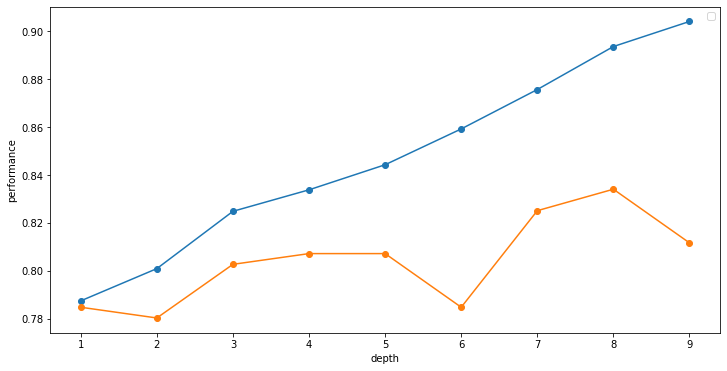

In [62]:
plt.figure(figsize = (12,6))
plt.plot(df['depth'], df['train_acc'], marker = 'o')
plt.plot(df['depth'], df['valid_acc'], marker = 'o')
plt.xlabel('depth')
plt.ylabel('performance')
plt.legend()

* depth 8 perorms the highest acuuracy

#### max leaf node

In [91]:
train_acc = []
validation_acc = []

for leaf in range(2,25):
  # creating the decision tree function
  model = DecisionTreeClassifier(max_leaf_nodes = leaf , random_state=4)

  # fitting the training data
  model.fit(X_train, y_train)

  train_acc.append(model.score(X_train, y_train))
  validation_acc.append(model.score(X_valid, y_valid))

In [92]:
df2 = pd.DataFrame({'max leaf node' : range(2,25) , 'train_acc': train_acc, 'valid_acc': validation_acc})
df2

,max leaf node,train_acc,valid_acc
0,2,0.787425,0.784753
1,3,0.787425,0.784753
2,4,0.800898,0.780269
3,5,0.800898,0.780269
4,6,0.823353,0.798206
5,7,0.823353,0.798206
6,8,0.823353,0.798206
7,9,0.829341,0.771300
8,10,0.835329,0.775785
9,11,0.836826,0.780269


No handles with labels found to put in legend.


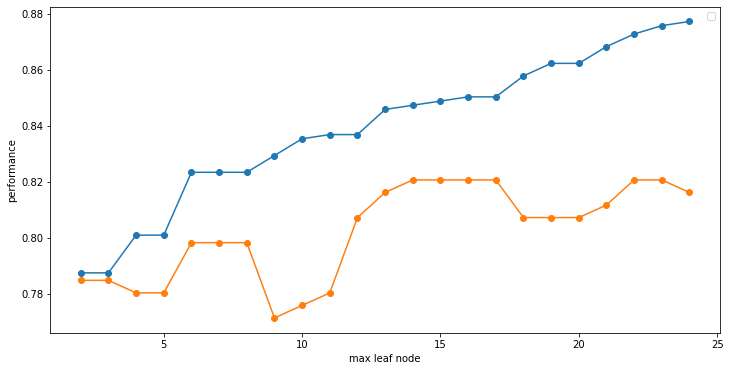

In [93]:
plt.figure(figsize = (12,6))
plt.plot(df2['max leaf node'], df2['train_acc'], marker = 'o')
plt.plot(df2['max leaf node'], df2['valid_acc'], marker = 'o')
plt.xlabel('max leaf node')
plt.ylabel('performance')
plt.legend()

* max leaf node seems to perorm the highest acuuracy on 23

In [123]:
# creating the decision tree function
model = DecisionTreeClassifier(max_leaf_nodes = 23 ,max_depth = 8,  random_state=4)


In [124]:
# fitting the training data
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=8, max_leaf_nodes=23, random_state=4)

In [125]:
# checking the tarining score
model.score(X_train, y_train)

0.8682634730538922

In [126]:
# checking the validation score
model.score(X_valid, y_valid)

0.8385650224215246

### Plot Decision Tree

In [127]:
from sklearn import tree

In [128]:
!pip install graphviz

In [129]:
dt = tree.export_graphviz(model, out_file = 'tree.dot', feature_names=X_train.columns, max_depth=2, filled = True)

In [130]:
!dot -Tpng tree.dot -o tree.png

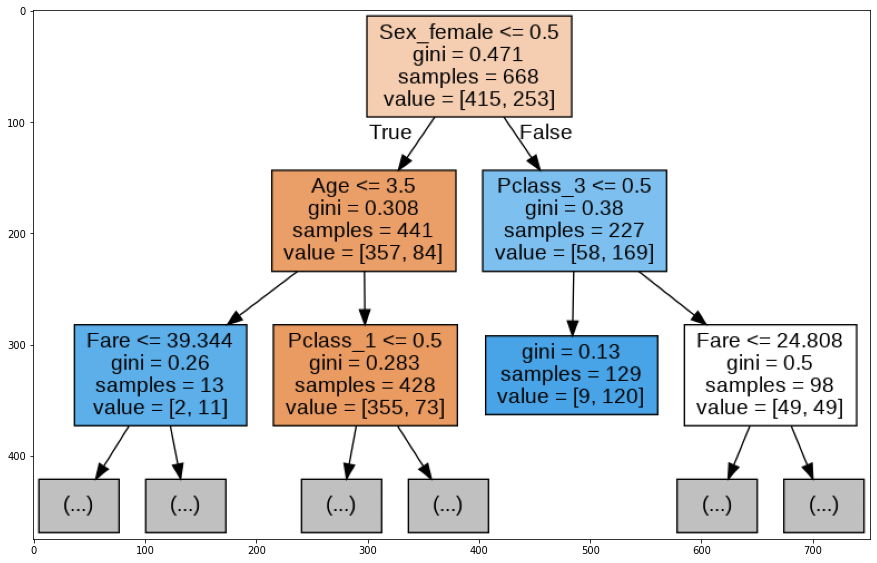

In [133]:
img = plt.imread('tree.png')
plt.figure(figsize = (15,15))
plt.imshow(img)